**классификатор текстов CONV1D**

Евгений Борисов <borisov.e@solarl.ru>

https://habr.com/ru/company/dca/blog/274027/    
http://help.sentiment140.com/for-students/   
http://study.mokoron.com  

## Библиотеки

In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_colwidth = 200  
import re
# import gzip
from tqdm import tqdm

In [2]:
tqdm.pandas()

/usr/lib/python3.9/site-packages/tqdm/std.py:699: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [3]:
def pp(d): return "{:,.0f}".format(d).replace(",", " ")
def ppr(d): print('записей:', pp(len(d)) )  

## Данные

In [4]:
ff = ['id', 'tdate', 'tmane', 'ttext', 'ttype', 'trep', 'tfav', 'tstcount', 'tfol', 'tfrien', 'listcount','unk']

In [5]:
neg = pd.read_csv('../data/twit/negative.csv.gz',sep=';',header=None)
ppr(neg)
neg.columns = ff

записей: 111 923


In [6]:
pos = pd.read_csv('../data/twit/positive.csv.gz',sep=';')
ppr(pos)
pos.columns = ff

записей: 114 910


In [7]:
data = pd.concat([pos,neg],sort=False)[['id','ttext', 'ttype']]
ppr(data)

записей: 226 833


In [8]:
data.sample(10)

,id,ttext,ttype
40501,413953793819045888,"@esbikero скорее банально =(\nЯ за хорошую рекламу, креативную и эффективную. на это нужны деньги. у банков они есть. а они $ на фигню тратят",-1
81869,410760810110418944,"@Limonchichek это ты на счет того, что было возле раздевалки, что ли? )",1
81666,410758852473151489,@kirillova_kate @anu_tko @daria_horan @KaterinaDelatou ещё раз спасибо :*,1
36876,413695693111300096,@_AlexeyKim_ программирование\nнам дали оч сложные задачи. и похожих на них нет в учебнике :(,-1
59630,410140852980154368,"@n_dasha_ Я ПРОСТО ЕЩЕ НЕ ОЧЕНЬ ПРИВИК :D\nПОРНУХИ ТИБЕ,ДОРОГОЙ :33",1
86969,410809678575468544,"@KhadzhiNadlena1 @ratmirsakaev ну ок,дохуя веселый и жизнерадостный человек;)",1
53921,410069939811545088,"RT @vesna_sm: @gruppa_GS признавайтесь, ваших рук дело?)) уж больно шрифт на ваш похож)) http://t.co/lM2Ab4qfpH",1
7862,409101556714582017,"Неделя открытий. Сначала порадовал @sonpascal своим клипом, теперь @Beisekeyev репортажем, ну и @yelikbayev как обычно своими твитами :)",1
3009,409044351365283840,"Оу, клевый вечер, повидал людей, по которым соскучился)",1
25916,409569146289266688,"Я проснулась, а на улице сказка!:) #первыйснег #Ялта #сказка #firstsnow #sooocute #follow http://t.co/u9HeiCnZ8v",1


## очистка данных

In [9]:
data['ttext_clean'] = data['ttext']\
    .progress_apply(lambda t:[ w.strip() for w in t.split() if w.strip() ] )\
    .progress_apply(lambda t:[ re.sub(r'^http.*',' url ', w.strip() ) for w in t ] )\
    .progress_apply(lambda t:[ re.sub(r'[:;]-*[)D]',' happysmile ', w.strip() )for w in t ])\
    .progress_apply(lambda t:[ re.sub(r'\)\)\)*',' happysmile ', w.strip() ) for w in t ])\
    .progress_apply(lambda t:[ re.sub(r'[:;]\*',' kisssmile ', w.strip() ) for w in t ])\
    .progress_apply(lambda t:[ re.sub(r':\(',' sadsmile ', w.strip() ) for w in t ])\
    .progress_apply(lambda t:[ re.sub(r'\(\(\(*',' sadsmile ', w.strip() ) for w in t ])

100%|██████████| 226833/226833 [00:01<00:00, 120063.51it/s]


In [10]:
data['ttext_clean'] = [ ' '.join(s) for s in data['ttext_clean'] ]

In [11]:
data['ttext_clean'] = data['ttext_clean'].str.lower()\
    .progress_apply(lambda s: re.sub( r'\W', ' ', s))\
    .progress_apply(lambda s: re.sub( r'_', ' ', s))\
    .progress_apply(lambda s: re.sub( r'\b\d+\b', ' digit ', s))\
    .progress_apply(lambda t:[ w.strip() for w in t.split() if w.strip() ] )\
    .progress_apply(lambda t: [w for w in t if not re.match( r'\b.*\d+.*\b', w) ])

100%|██████████| 226833/226833 [00:02<00:00, 103054.24it/s]


In [12]:
data.sample(3)

,id,ttext,ttype,ttext_clean
104022,411117512118390785,"@StepaKrivosheev Стёпа, ты меня пугаешь! из славянских и прочих племён обитавших и обитающих на территории современной РФ )",1,"[stepakrivosheev, стёпа, ты, меня, пугаешь, из, славянских, и, прочих, племён, обитавших, и, обитающих, на, территории, современной, рф]"
20566,409416254227628032,"@Minismumrik ниче,я исправлю это при первой же возможности)))",1,"[minismumrik, ниче, я, исправлю, это, при, первой, же, возможности, happysmile]"
71952,418015246151073792,"RT @abbat15: Похоже, никаких терактов не было... Происки Госдепа?(((",-1,"[rt, похоже, никаких, терактов, не, было, происки, госдепа, sadsmile]"


In [13]:
# удаление коротких слов
data['ttext_clean'] = data['ttext_clean'].progress_apply(lambda t:[w for w in t if len(w)>2])

100%|██████████| 226833/226833 [00:00<00:00, 344460.04it/s]


In [14]:
ppr(data)
data = data[ data['ttext_clean'].str.len()>0 ].reset_index(drop=True) 
ppr(data)

записей: 226 833
записей: 226 831


In [15]:
data.sample(3)

,id,ttext,ttype,ttext_clean
184519,417596813068087296,настроение прям фу!!!!!(((вообще фу!!!хочется изменить все картинки вокруг себя!!!!!,-1,"[настроение, прям, sadsmile, вообще, хочется, изменить, все, картинки, вокруг, себя]"
217688,423857148334837760,"@terehina00alena ради таких моментов хочу в .. что это, театр?:(",-1,"[ради, таких, моментов, хочу, что, это, театр, sadsmile]"
68786,410405061148565504,"Активисты направления ""Культура"" договорились о сотрудничестве) @ Аварский Театр http://t.co/dMBaBtViVY",1,"[активисты, направления, культура, договорились, сотрудничестве, аварский, театр, url]"


In [16]:
voc = sorted(set.union(*[ set(s) for s in data['ttext_clean'].values.tolist() ]))
voc = { w:i+1 for i,w in enumerate(voc) }
voc['<pad>']= 0
ppr(voc)

записей: 239 518


In [17]:
voc

{'aaa': 1,
 'aaaa': 2,
 'aaaaa': 3,
 'aaaaaaaaaa': 4,
 'aaaaaaaaaaart': 5,
 'aaaaaahhhhhhwow': 6,
 'aaaasyaaa': 7,
 'aaaats': 8,
 'aaahaahaaaah': 9,
 'aaaidar': 10,
 'aaaiguuul': 11,
 'aaakristya': 12,
 'aaalsusha': 13,
 'aaarrrrrrrr': 14,
 'aaaw': 15,
 'aaburnashov': 16,
 'aafrolova': 17,
 'aakarimova': 18,
 'aakellah': 19,
 'aakuzichev': 20,
 'aaleksandra': 21,
 'aaleksandrowna': 22,
 'aalello': 23,
 'aalexithymiaa': 24,
 'aalistok': 25,
 'aalive': 26,
 'aallanavaz': 27,
 'aalove': 28,
 'aammmmmmmm': 29,
 'aamnastya': 30,
 'aamooorr': 31,
 'aamy': 32,
 'aanaokay': 33,
 'aanastasiaden': 34,
 'aandrushkas': 35,
 'aanechaev': 36,
 'aanjkaa': 37,
 'aanneeeet': 38,
 'aannybarry': 39,
 'aanvarova': 40,
 'aanxaa': 41,
 'aapogodina': 42,
 'aarn': 43,
 'aaronpaul': 44,
 'aasexuality': 45,
 'aashirokov': 46,
 'aasokol': 47,
 'aasviridova': 48,
 'aatemkin': 49,
 'aavsasha': 50,
 'aavst': 51,
 'aaw': 52,
 'aaww': 53,
 'aaxaxaax': 54,
 'aayra': 55,
 'aazbaeva': 56,
 'abachurin': 57,
 'abaevart': 

## строим датасет

In [18]:
data['code'] = data['ttext_clean'].progress_apply(lambda t: [ voc[w] for w in t] )

100%|██████████| 226831/226831 [00:00<00:00, 287154.90it/s]


In [19]:
data[['ttext','ttext_clean','code']].sample(3)

,ttext,ttext_clean,code
147857,@VadimKyrilenko о_О ахах\nЧегойта\nИзбиение жены? Ай яй яй\nАхахах,"[vadimkyrilenko, ахах, чегойта, избиение, жены, ахахах]","[61459, 73504, 230955, 117284, 107907, 73541]"
82207,"RT @Yankisovna_Ksy: ""@Ksusha1997more: @Yankisovna_Ksy очень мило;-)""","[yankisovna, ksy, yankisovna, ksy, очень, мило, happysmile]","[65880, 31122, 65880, 31122, 162618, 139728, 21932]"
49646,"Лион - одно из лучших что видел, плохо снято правда, 1994 год как никак)","[лион, одно, лучших, что, видел, плохо, снято, правда, digit, год, как, никак]","[133425, 156137, 134742, 232369, 85427, 169084, 202875, 178748, 13805, 95256, 121109, 151114]"


In [20]:
data['code'].str.len().describe().astype(int)

count    226831
mean         10
std           3
min           1
25%           7
50%           9
75%          13
max          32
Name: code, dtype: int64

<AxesSubplot:ylabel='Frequency'>

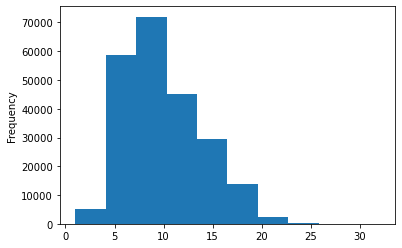

In [21]:
data['code'].str.len().plot.hist()

In [22]:
code_max_len = data['code'].str.len().max()
code_max_len

32

In [23]:
z = [0]*code_max_len
data['code'] = data['code'].progress_apply(lambda c: c+z[:(code_max_len-len(c))]  )

100%|██████████| 226831/226831 [00:00<00:00, 427100.59it/s]


In [24]:
x = np.stack( data['code'].values).astype(int)
x.shape

(226831, 32)

In [25]:
# x = np.flip(x,axis=1)

In [26]:
n_classes=2
target = data['ttype'].values
target = (target+1)//2
y = np.eye(n_classes)[target]

y.shape

(226831, 2)

In [27]:
max_word = x.max()
seq_len = x.shape[1]
x.shape , y.shape, max_word, seq_len

((226831, 32), (226831, 2), 239517, 32)

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=.4 )
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((136098, 32), (136098, 2), (90733, 32), (90733, 2))

In [29]:
y_train.sum(axis=0),y_test.sum(axis=0),

(array([67123., 68975.]), array([44799., 45934.]))

## строим нейросеть 

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
#from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.layers import Dense

In [31]:
embedding_size = 64

model = Sequential()
model.add(Embedding( input_dim = max_word+1, output_dim = embedding_size, input_length = seq_len,))
# model.add(LSTM(32))
model.add(Conv1D(filters=128,padding='same',kernel_size=5))
model.add(GlobalMaxPooling1D())
model.add(Dense(n_classes, activation='softmax'))

In [32]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

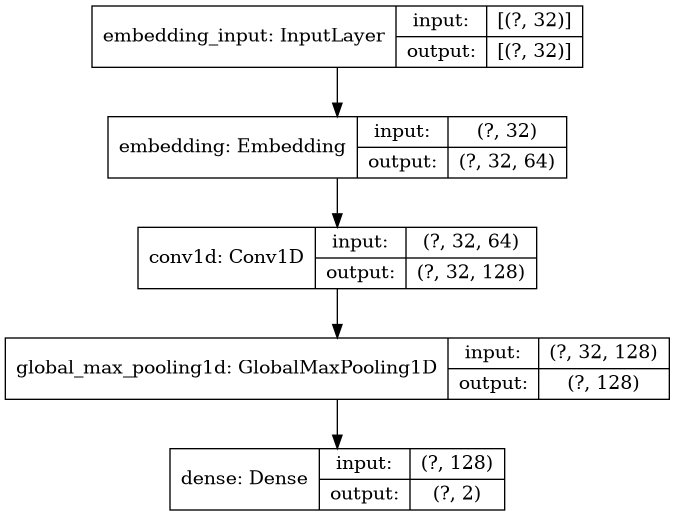

In [33]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_layer_names=True, show_shapes=True )

In [34]:
%%time

hist = model.fit(x_train,y_train, batch_size=1024, epochs=9, validation_split=.3)

Epoch 1/9
94/94 [==============================] - 8s 86ms/step - loss: 0.3540 - accuracy: 0.8516 - val_loss: 0.2070 - val_accuracy: 0.8927
Epoch 2/9
94/94 [==============================] - 8s 81ms/step - loss: 0.1297 - accuracy: 0.9468 - val_loss: 0.2276 - val_accuracy: 0.8894
Epoch 3/9
94/94 [==============================] - 8s 81ms/step - loss: 0.0516 - accuracy: 0.9831 - val_loss: 0.2866 - val_accuracy: 0.8860
Epoch 4/9
94/94 [==============================] - 8s 81ms/step - loss: 0.0208 - accuracy: 0.9940 - val_loss: 0.3436 - val_accuracy: 0.8821
Epoch 5/9
94/94 [==============================] - 8s 82ms/step - loss: 0.0098 - accuracy: 0.9976 - val_loss: 0.3925 - val_accuracy: 0.8812
Epoch 6/9
94/94 [==============================] - 8s 82ms/step - loss: 0.0052 - accuracy: 0.9989 - val_loss: 0.4329 - val_accuracy: 0.8812
Epoch 7/9
94/94 [==============================] - 8s 81ms/step - loss: 0.0031 - accuracy: 0.9995 - val_loss: 0.4678 - val_accuracy: 0.8806
Epoch 8/9
94/94 [===

In [35]:
model.evaluate(x_test ,y_test )

2836/2836 [==============================] - 3s 1ms/step - loss: 0.5007 - accuracy: 0.8840


[0.5006609559059143, 0.8839782476425171]

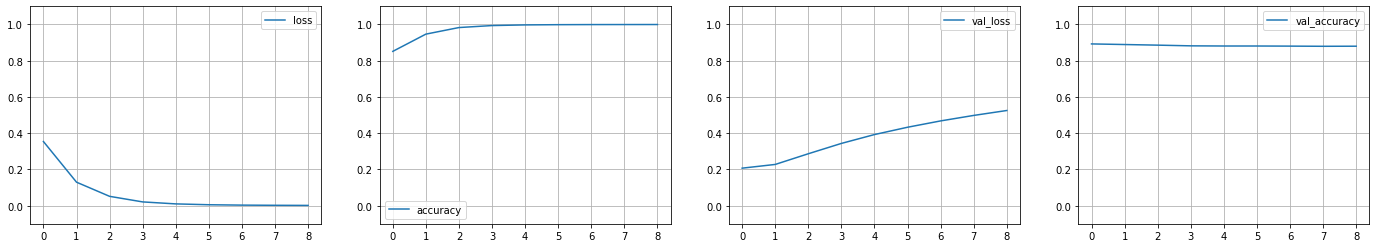

In [36]:
from matplotlib import pyplot as plt

k = hist.history.keys()

w,h = 6,4

fig,ax = plt.subplots(1,len(k),figsize=(w*len(k),h))
for i,n in enumerate(k):
    ax[i].plot(hist.history[n],label=n)
    ax[i].grid(True)
    ax[i].legend()
    ax[i].set_ylim([-.1,1.1])